In [1]:
import pandas as pd
import numpy as np


In [84]:

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'  #time_series_19-covid-Confirmed.csv'#
dfcases = pd.read_csv(url,index_col=0,parse_dates=[0])
dfcases = dfcases.drop(columns=['Lat','Long'])
threshold = 10000  #used to remove countries in earlier infections from plots

In [85]:
#dfcases = pd.read_csv('time_series_19-covid-Confirmed.csv')
dfcases.at['Quebec','4/4/20'] = 6997
dfcases.loc['Quebec']

Country/Region    Canada
1/22/20                0
1/23/20                0
1/24/20                0
1/25/20                0
                   ...  
4/1/20              4611
4/2/20              5518
4/3/20              6101
4/4/20              6997
4/5/20              7944
Name: Quebec, Length: 76, dtype: object

In [86]:
df = dfcases.groupby('Country/Region').sum()
#df = df.T
df = df.reset_index()
#df = df.drop([0, 1])
#df['index'] = df['index'].astype('datetime64')
#df = df.set_index('index')


df = df.rename(columns={'Country/Region': 'date'})

df = df.T
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df = df.reset_index()
df = df.rename(columns={'index': 'dates'})
df['dates'] = df['dates'].astype('datetime64')
df = df.set_index('dates')
df = df.apply(pd.to_numeric) # convert all columns of DataFrame
#df.to_csv('dfcases.csv')
df.head()


date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
dates,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0


In [87]:
dfmax = pd.DataFrame(df.max(),columns=['max'] )
dfmax = dfmax.reset_index()
dfmax = dfmax.rename(columns={'date': 'country'})
#dfmax = dfmax.set_index('country')
dfmax.to_csv('max.csv')

In [88]:
dfmax = dfmax[dfmax['max'] > threshold]
llist = dfmax['country'].values.tolist()
llist = llist + ['Japan']
df1 = df[llist]
df1.tail()

date,Austria,Belgium,Brazil,Canada,China,France,Germany,Iran,Italy,"Korea, South",Netherlands,Portugal,Spain,Switzerland,Turkey,US,United Kingdom,Japan
dates,,,,,,,,,,,,,,,,,,
2020-04-01,10711,13964,6836,9560,82361,57749,77872,47593,110574,9887,13696,8251,104118,17768,15679,213372,29865,2178
2020-04-02,11129,15348,8044,11284,82432,59929,84794,50468,115242,9976,14788,9034,112065,18827,18135,243453,34173,2495
2020-04-03,11524,16770,9056,12437,82511,65202,91159,53183,119827,10062,15821,9886,119199,19606,20921,275586,38689,2617
2020-04-04,11781,18431,10360,13874,82543,90848,96092,55743,124632,10156,16727,10524,126168,20505,23934,308850,42477,3139
2020-04-05,12051,19691,11130,15756,82602,93773,100123,58226,128948,10237,17953,11278,131646,21100,27069,337072,48436,3139


In [89]:
# slice step to reverse values in index
#df[::-1]

In [90]:
dfgt = pd.DataFrame()
dflt = pd.DataFrame()
shift = {}

for country in llist:
    #Check country data for if the value is greater than 100
    dfgt[country] = df1[country]>=100
    # Determine the number of days to shift backwards to day zero.
    sh = pd.to_datetime('2020-01-22') - dfgt[country].idxmax() #idxmax() -> find the first instance of True in the above Boolean list
    df1[country] = df1[country].shift(sh.days)
    
    #if country in poplist:
    #    try:
    #        num = pop['Population'].loc[pop['Country'] == country].values
    #        df[country] = df[country]/num[0]*100
    #    except:
    #        pass


df1['China'] = df1['China'].shift(4)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
#df = df.reset_index()

#pd.to_timedelta(df.index - pd.to_datetime('2020-01-22'))

df1.index = pd.to_timedelta(df.index - pd.to_datetime('2020-01-22')).days
df1

date,Austria,Belgium,Brazil,Canada,China,France,Germany,Iran,Italy,"Korea, South",Netherlands,Portugal,Spain,Switzerland,Turkey,US,United Kingdom,Japan
dates,,,,,,,,,,,,,,,,,,
0,104.0,109.0,151.0,108.0,NaN,100.0,130.0,139.0,155.0,104.0,128.0,112.0,120.0,114.0,192.0,118.0,116.0,105.0
1,131.0,169.0,151.0,117.0,NaN,130.0,159.0,245.0,229.0,204.0,188.0,169.0,165.0,214.0,359.0,149.0,164.0,122.0
2,182.0,200.0,162.0,193.0,NaN,191.0,196.0,388.0,322.0,433.0,265.0,245.0,222.0,268.0,670.0,217.0,207.0,147.0
3,246.0,239.0,200.0,198.0,NaN,204.0,262.0,593.0,453.0,602.0,321.0,331.0,259.0,337.0,1236.0,262.0,274.0,159.0
4,302.0,267.0,321.0,252.0,548.0,288.0,482.0,978.0,655.0,833.0,382.0,448.0,400.0,374.0,1529.0,402.0,322.0,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,NaN,NaN,NaN,NaN,81999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,82122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,82198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
dfmelt = df1.reset_index()
dfmelt = dfmelt.melt(id_vars=['dates'])
dfmelt = dfmelt.rename(columns={'date': 'country'})
dfmelt = dfmelt.rename(columns={'value': 'cases'})
#dfmelt = dfmelt.drop(columns=['dates'])
dfmelt = dfmelt.set_index('dates')
dfmelt['country'] = dfmelt['country'].astype('category')
#dfmelt['cases'] = dfmelt['cases'].astype('int32') # fails due to nan
gbt = dfmelt.groupby(dfmelt.index).sum()
gbt.head()

,cases
dates,
0,2105.0
1,3065.0
2,4508.0
3,6176.0
4,8953.0


In [93]:
import plotly.express as px

In [94]:
fig = px.line(dfmelt, x=dfmelt.index, y="cases",color='country')#,log_y=True)
fig.update_layout(
    title="Aligned Covid-19 Active Cases Data",
    xaxis_title="Days Since 100th Active Case",
    yaxis_title="Number of Active Cases",
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="#7f7f7f"
    ),
    legend=dict(
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        )
    )
)
fig.show()
fig.write_html("infections_aligned.html")

In [95]:
figlog = px.line(dfmelt, x=dfmelt.index, y="cases",color='country',log_y=True)
figlog.update_layout(
    title="Aligned Covid-19 Active Cases Data",
    xaxis_title="Days Since 100th Active Case",
    yaxis_title="Number of Active Cases [Log Scale]",
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="#7f7f7f"
    ),
    legend=dict(
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        )
    )
)
figlog.show()
figlog.write_html("infections_logscal.html")

# Day-To-Day differences

In [96]:
df2 = df1.diff()
df2.head()

date,Austria,Belgium,Brazil,Canada,China,France,Germany,Iran,Italy,"Korea, South",Netherlands,Portugal,Spain,Switzerland,Turkey,US,United Kingdom,Japan
dates,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27.0,60.0,0.0,9.0,NaN,30.0,29.0,106.0,74.0,100.0,60.0,57.0,45.0,100.0,167.0,31.0,48.0,17.0
2,51.0,31.0,11.0,76.0,NaN,61.0,37.0,143.0,93.0,229.0,77.0,76.0,57.0,54.0,311.0,68.0,43.0,25.0
3,64.0,39.0,38.0,5.0,NaN,13.0,66.0,205.0,131.0,169.0,56.0,86.0,37.0,69.0,566.0,45.0,67.0,12.0
4,56.0,28.0,121.0,54.0,NaN,84.0,220.0,385.0,202.0,231.0,61.0,117.0,141.0,37.0,293.0,140.0,48.0,11.0


In [97]:
dfmelt2 = df2.reset_index()
dfmelt2 = dfmelt2.melt(id_vars=['dates'])
dfmelt2 = dfmelt2.rename(columns={'date': 'country'})
dfmelt2 = dfmelt2.rename(columns={'value': 'cases'})
#dfmelt = dfmelt.drop(columns=['dates'])
dfmelt2 = dfmelt2.set_index('dates')
dfmelt2['country'] = dfmelt2['country'].astype('category')
#dfmelt['cases'] = dfmelt['cases'].astype('int32') # fails due to nan
dfmelt2.tail()

,country,cases
dates,,
70,Japan,NaN
71,Japan,NaN
72,Japan,NaN
73,Japan,NaN
74,Japan,NaN


In [ ]:
figdif = px.line(dfmelt2, x=dfmelt2.index, y="cases", color='country')
figdif.update_layout(
    title="New Daily Cases",
    xaxis_title="Days Since 100th Active Case",
    yaxis_title="Daily Cases",
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="#7f7f7f"
    ),
    legend=dict(
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        )
    )
)
figdif.show()
figdif.write_html("differences.html")

# Data as Percentage of Country Population
Lets look at the above data but on a percentage of population basis

In [76]:
pop = pd.read_csv('population.csv')
poplist = pop['Country'].to_list()


In [77]:
dfpop = pd.DataFrame()

for country in llist:
    # Check is country name from Github is also in the population CSV
    if country in poplist:
        try:
            num = pop['Population'].loc[pop['Country'] == country].values #find the population data, comes out as array
            dfpop[country] = df1[country]/num[0]*100 #convert the df cases values from absolute to percetnage of country population
        except:
            pass

dfpop.head()

,Australia,Austria,Belgium,Brazil,Canada,China,France,Germany,Iran,Israel,...,Netherlands,Norway,Portugal,Russia,Spain,Sweden,Switzerland,Turkey,US,United Kingdom
dates,,,,,,,,,,,,,,,,,,,,,
0,0.000420,0.001155,0.000940,0.000071,0.000286,NaN,0.000153,0.000155,0.000165,0.001155,...,0.000747,0.001992,0.001098,0.000078,0.000257,0.001000,0.001317,0.000228,0.000036,0.000171
1,0.000502,0.001455,0.001458,0.000071,0.000310,NaN,0.000199,0.000190,0.000292,0.001456,...,0.001097,0.002712,0.001657,0.000101,0.000353,0.001594,0.002473,0.000426,0.000045,0.000242
2,0.000502,0.002021,0.001726,0.000076,0.000511,NaN,0.000293,0.000234,0.000462,0.001791,...,0.001547,0.003246,0.002403,0.000136,0.000475,0.002010,0.003097,0.000794,0.000066,0.000305
3,0.000784,0.002731,0.002062,0.000094,0.000525,NaN,0.000313,0.000313,0.000706,0.002461,...,0.001873,0.003781,0.003246,0.000173,0.000554,0.002456,0.003894,0.001466,0.000079,0.000404
4,0.000980,0.003353,0.002304,0.000151,0.000668,0.000038,0.000441,0.000575,0.001164,0.002519,...,0.002229,0.007378,0.004394,0.000210,0.000856,0.003515,0.004321,0.001813,0.000121,0.000474


In [78]:
dfpctmelt = dfpop.reset_index()
dfpctmelt = dfpctmelt.melt(id_vars=['dates'])

dfpctmelt = dfpctmelt.rename(columns={'variable': 'country'})
dfpctmelt = dfpctmelt.rename(columns={'value': 'percent'})
dfpctmelt = dfpctmelt.set_index('dates')
dfpctmelt['country'] = dfpctmelt['country'].astype('category')
dfpctmelt.tail()

,country,percent
dates,,
70,United Kingdom,NaN
71,United Kingdom,NaN
72,United Kingdom,NaN
73,United Kingdom,NaN
74,United Kingdom,NaN


In [79]:
popfig = px.line(dfpctmelt, x=dfpctmelt.index, y="percent",color='country',log_y=True)
popfig.update_layout(
    title="Aligned Covid-19 Active Cases Data",
    xaxis_title="Days Since 100th Active Case",
    yaxis_title="Percent of Country Infected",
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="#7f7f7f"
    ),
    legend=dict(
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        )
    )
)
popfig.show()
popfig.write_html("percentage_aligned.html")

# Exponent Curve Fittings
Lets look at first 10 days and fit an exponent curve to it.

In [21]:
dffull = dfcases#.set_index('Province/State','Country/Region')
dffull = dffull.head().T

dffull.columns = dffull.iloc[1]
dffull = dffull.drop(dffull.index[1])
dffull = dffull.reset_index()
dffull = dffull.rename(columns={'Country/Region': 'dates'})
#df = df.reset_index()
#df = df.rename(columns={'index': 'dates'})
#df['dates'] = df['dates'].astype('datetime64')
#df = df.set_index('dates')
dffull.tail()

1/22/20,index,0,0,0,0,0
70,4/1/20,237,259,847,390,8
71,4/2/20,273,277,986,428,8
72,4/3/20,281,304,1171,439,8
73,4/4/20,299,333,1251,466,10
74,4/5/20,349,361,1320,501,14


In [22]:
dffull.index

RangeIndex(start=0, stop=75, step=1)

In [23]:
%matplotlib inline
#%matplotlib widget
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [24]:
def func(x, a, b, c):
    return a * np.exp(b * x) + c

#def func(x, a, b):
#    return a * np.exp(b * x)

In [25]:
metadf = pd.DataFrame()

In [26]:
plot = dfmelt.loc[(dfmelt['country'] == 'Canada') & (dfmelt['cases'].isna() != True)]
plot = plot.loc[plot.index <=10]
plot

,country,cases
dates,,
0,Canada,108.0
1,Canada,117.0
2,Canada,193.0
3,Canada,198.0
4,Canada,252.0
5,Canada,415.0
6,Canada,478.0
7,Canada,657.0
8,Canada,800.0


Australia.png
Austria.png
Belgium.png
Brazil.png
Canada.png
China.png
France.png
Germany.png
Iran.png
Israel.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Italy.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Korea, South.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Netherlands.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Norway.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Portugal.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Russia.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Spain.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Sweden.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Switzerland.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Turkey.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



US.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



United Kingdom.png


<Figure size 864x864 with 0 Axes>

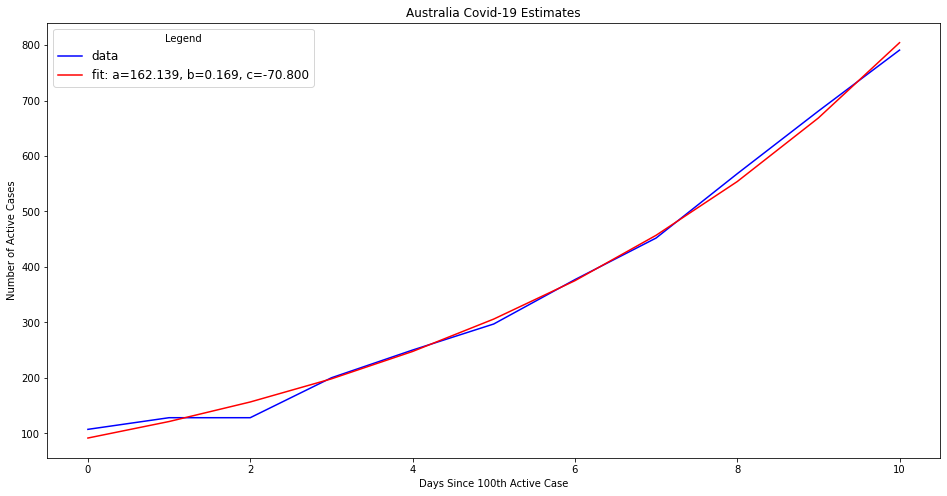

<Figure size 864x864 with 0 Axes>

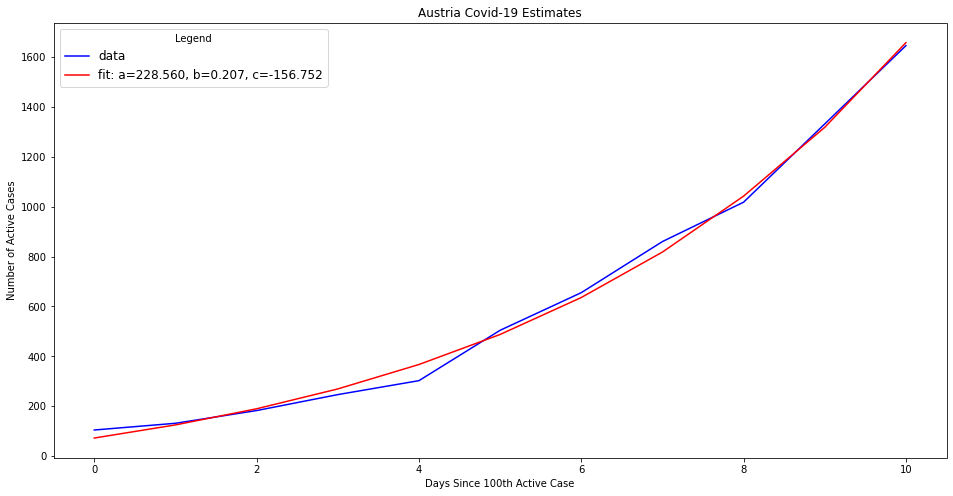

<Figure size 864x864 with 0 Axes>

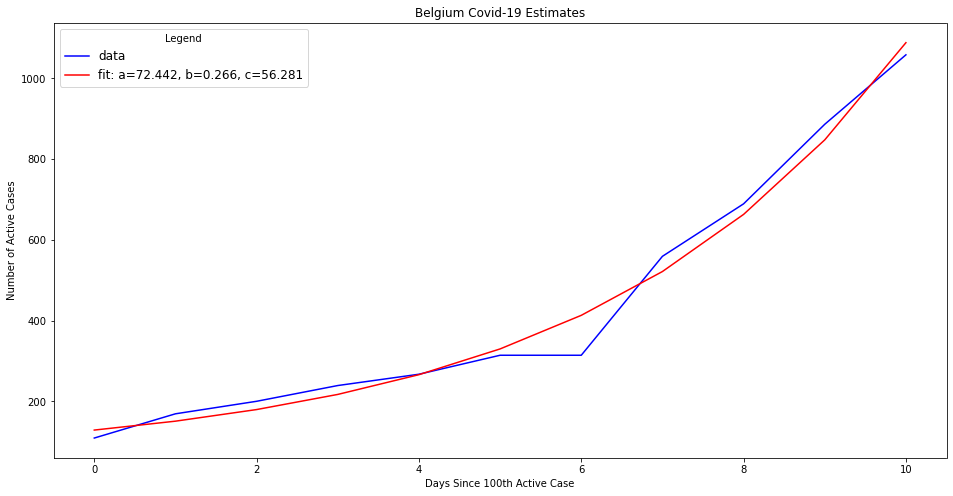

<Figure size 864x864 with 0 Axes>

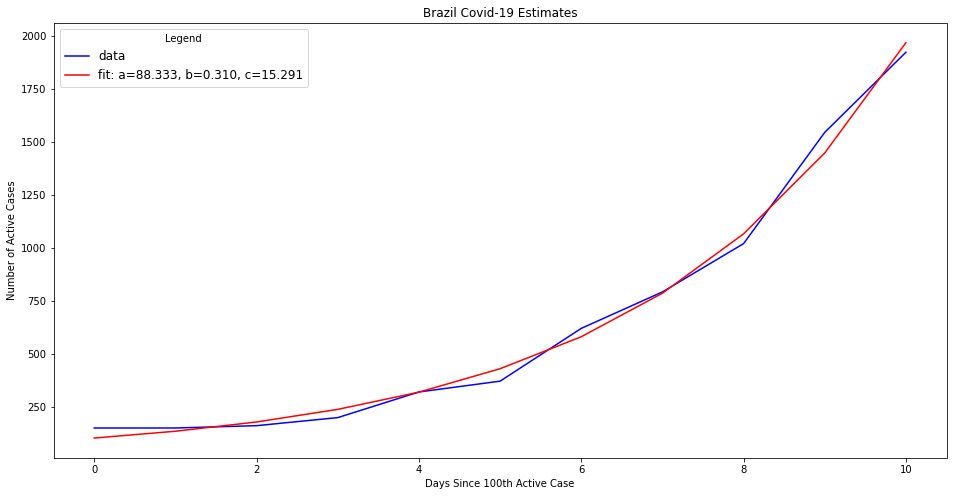

<Figure size 864x864 with 0 Axes>

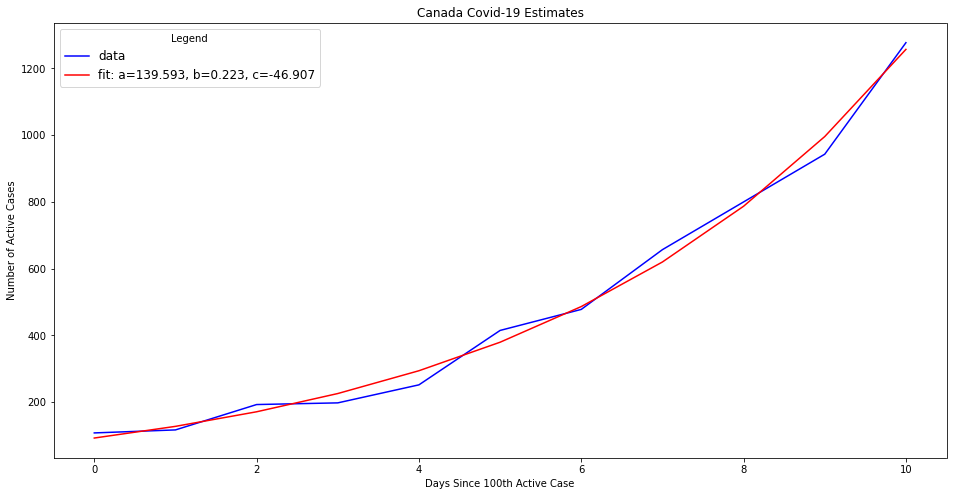

<Figure size 864x864 with 0 Axes>

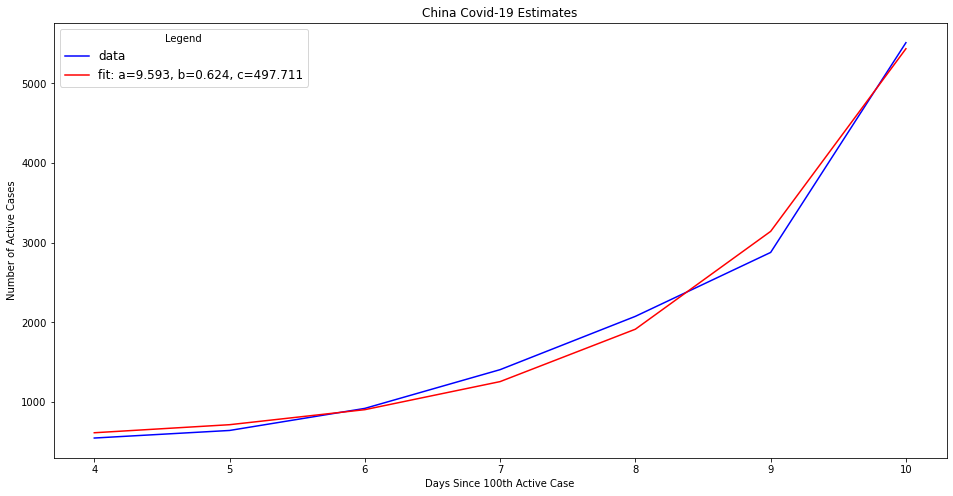

<Figure size 864x864 with 0 Axes>

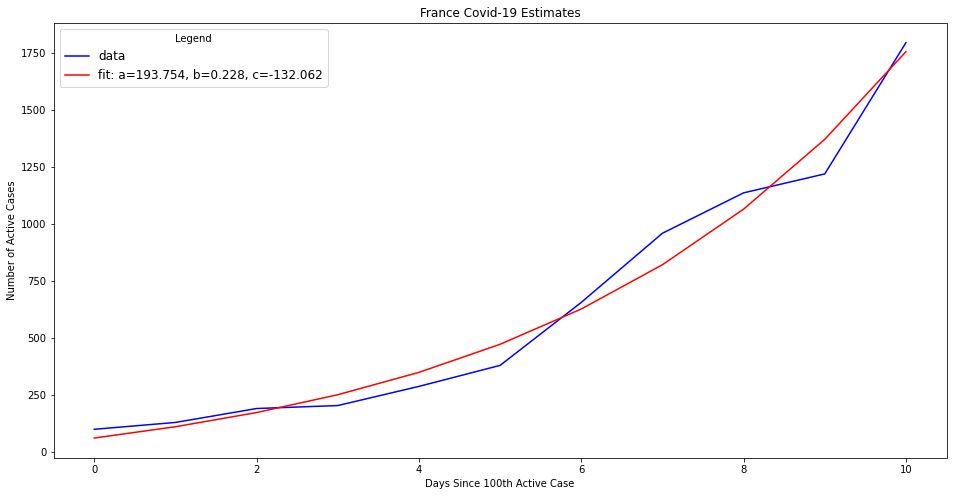

<Figure size 864x864 with 0 Axes>

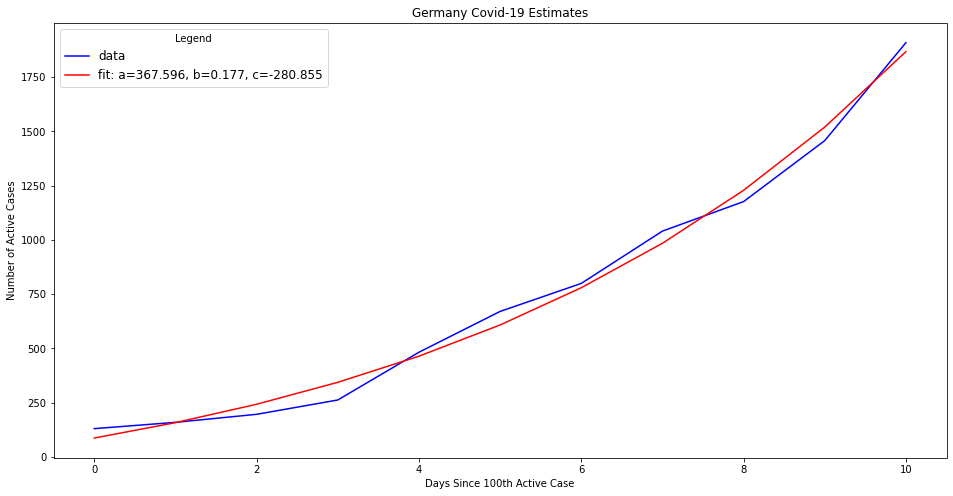

<Figure size 864x864 with 0 Axes>

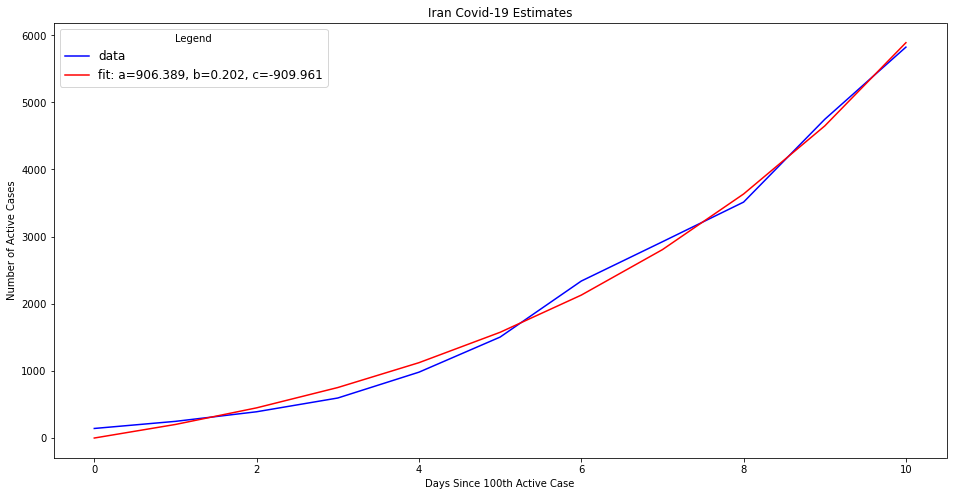

<Figure size 864x864 with 0 Axes>

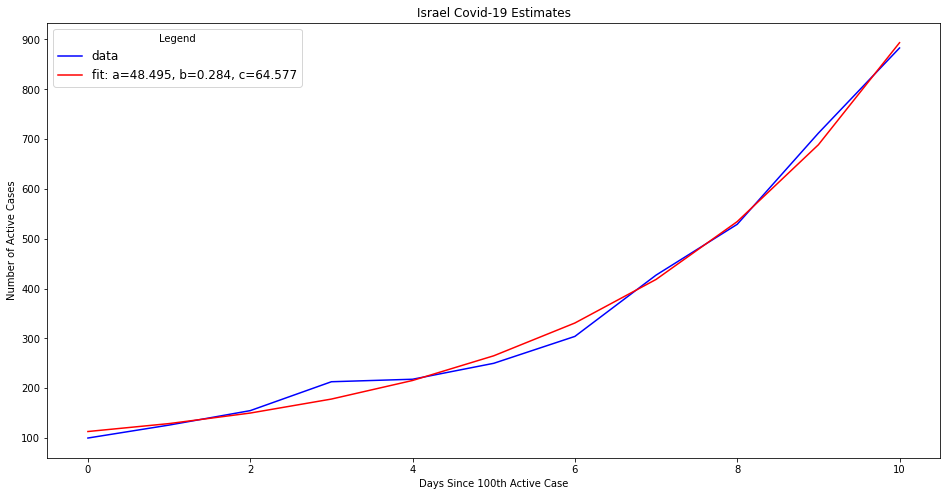

<Figure size 864x864 with 0 Axes>

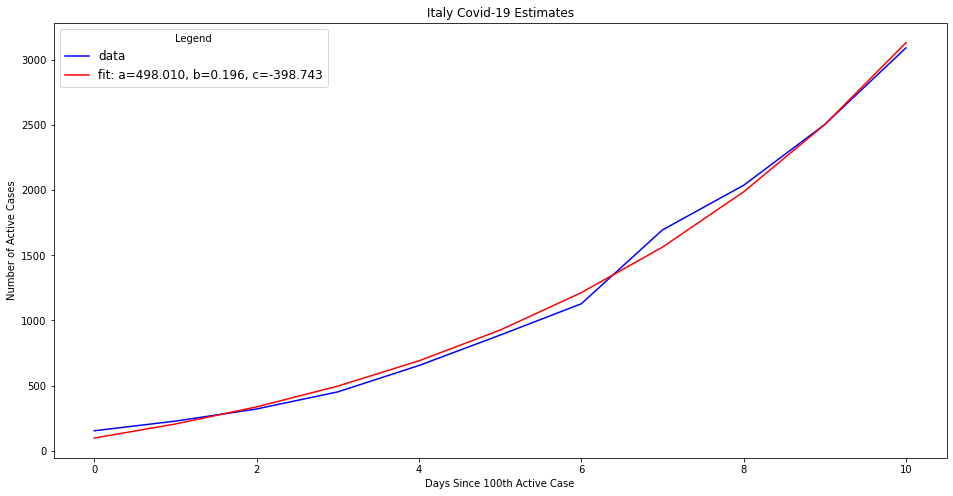

<Figure size 864x864 with 0 Axes>

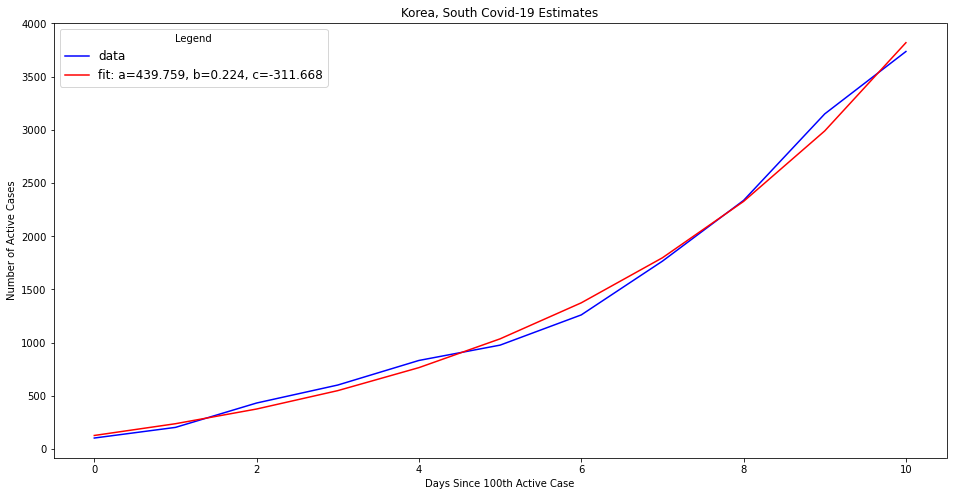

<Figure size 864x864 with 0 Axes>

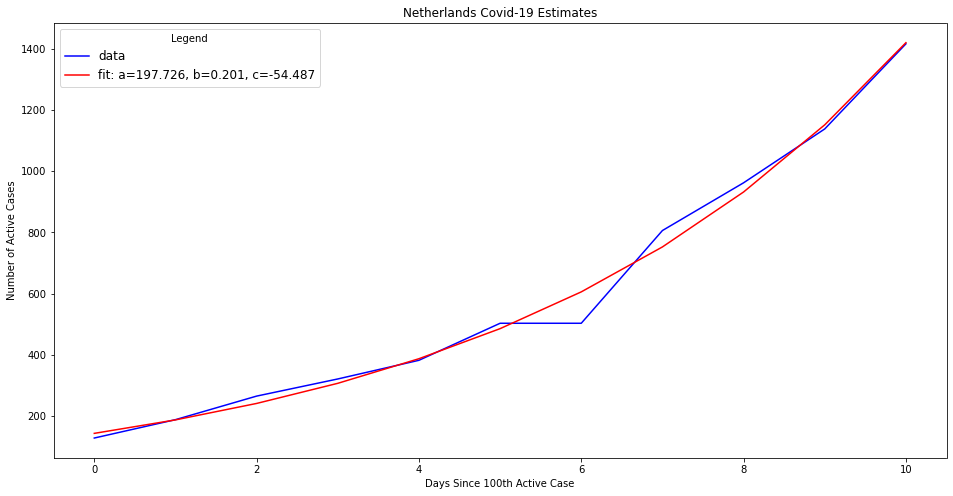

<Figure size 864x864 with 0 Axes>

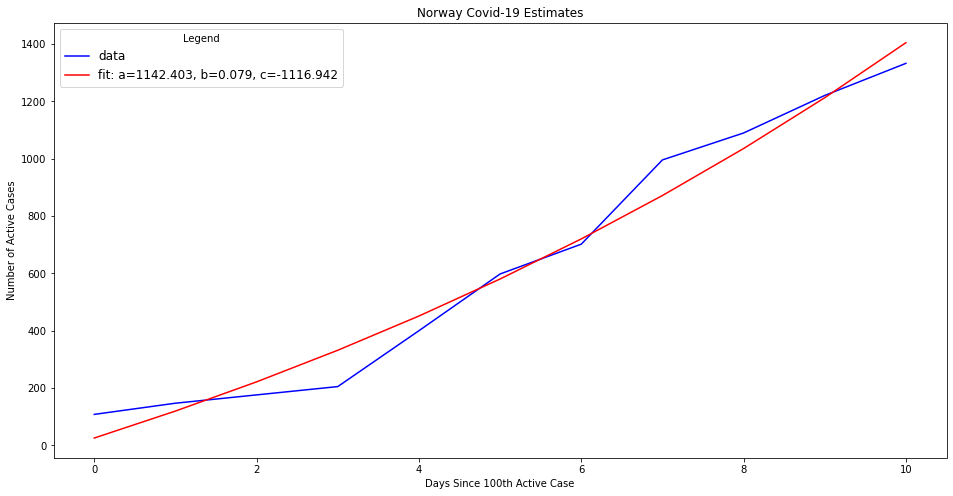

<Figure size 864x864 with 0 Axes>

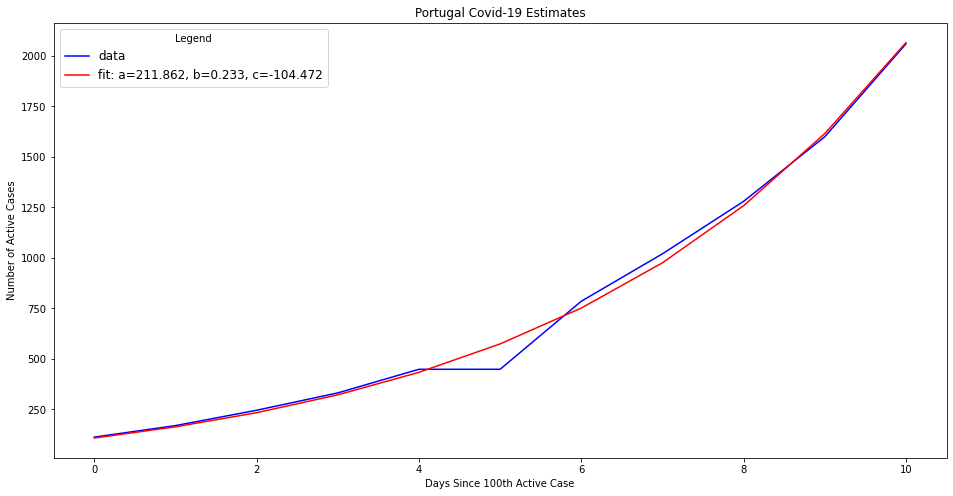

<Figure size 864x864 with 0 Axes>

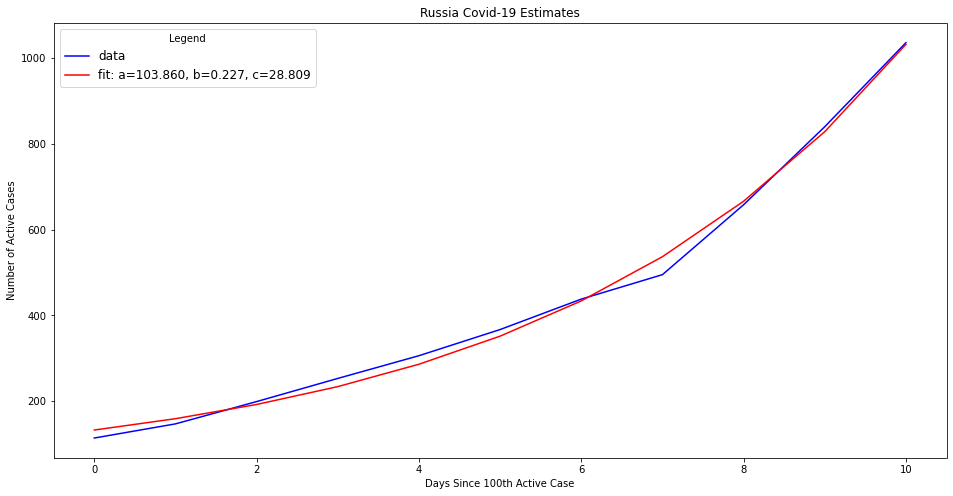

<Figure size 864x864 with 0 Axes>

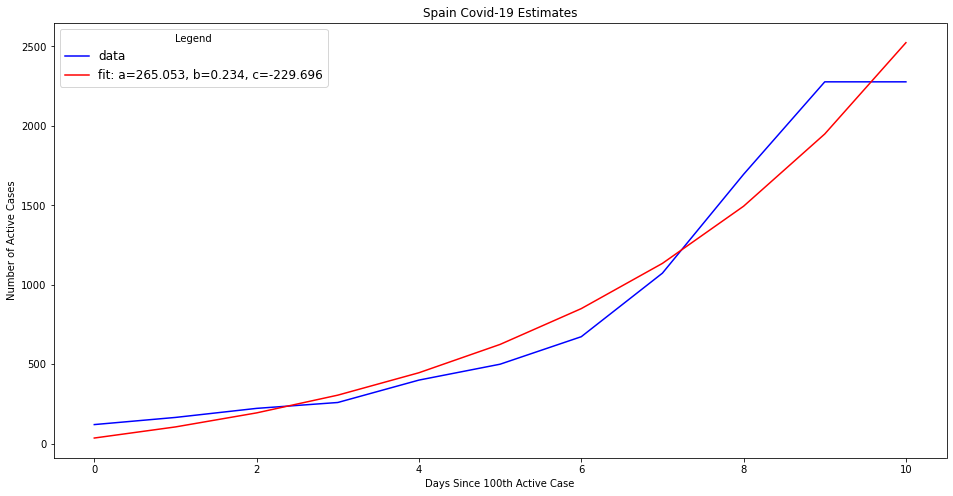

<Figure size 864x864 with 0 Axes>

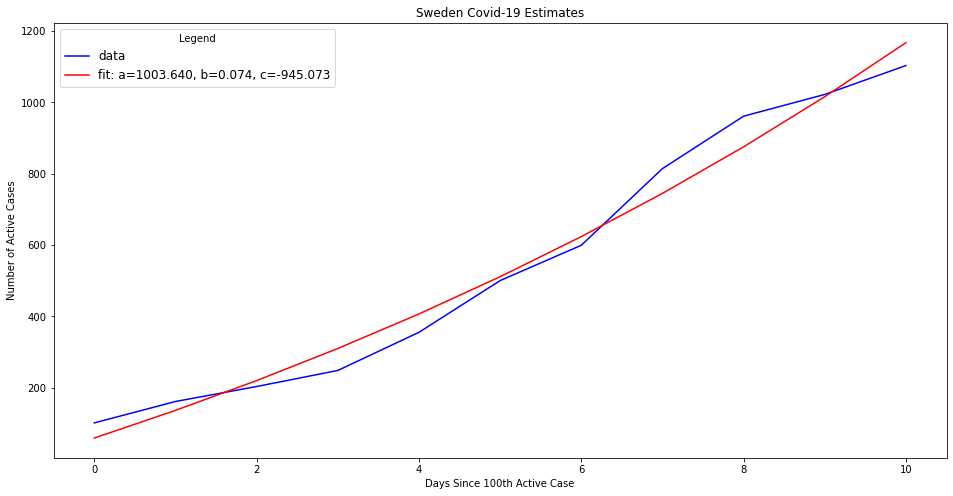

<Figure size 864x864 with 0 Axes>

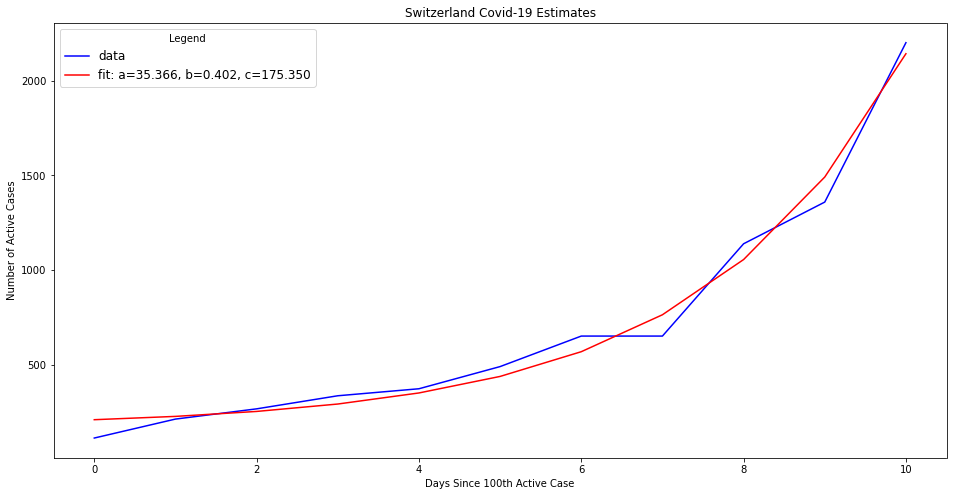

<Figure size 864x864 with 0 Axes>

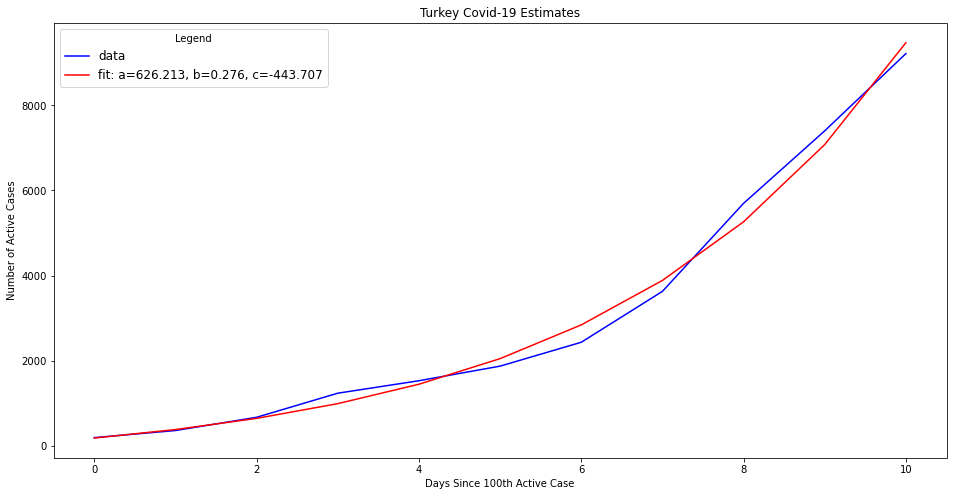

<Figure size 864x864 with 0 Axes>

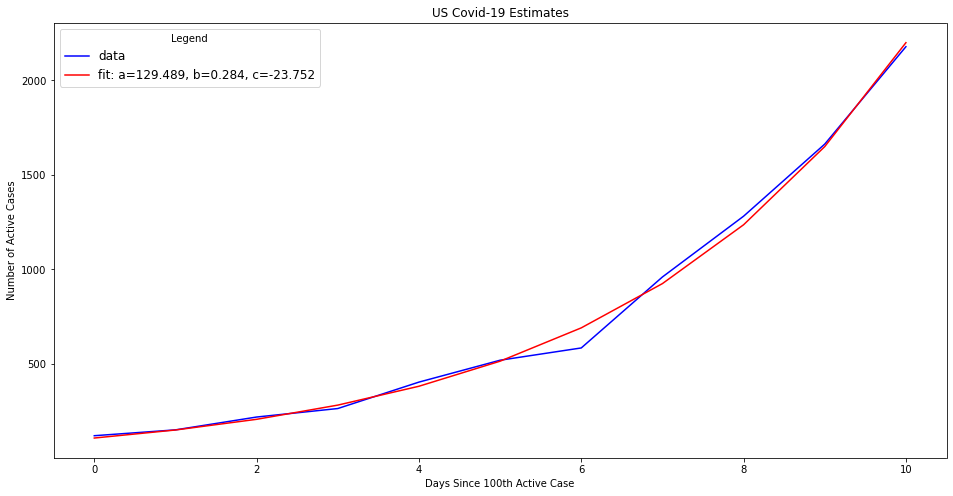

<Figure size 864x864 with 0 Axes>

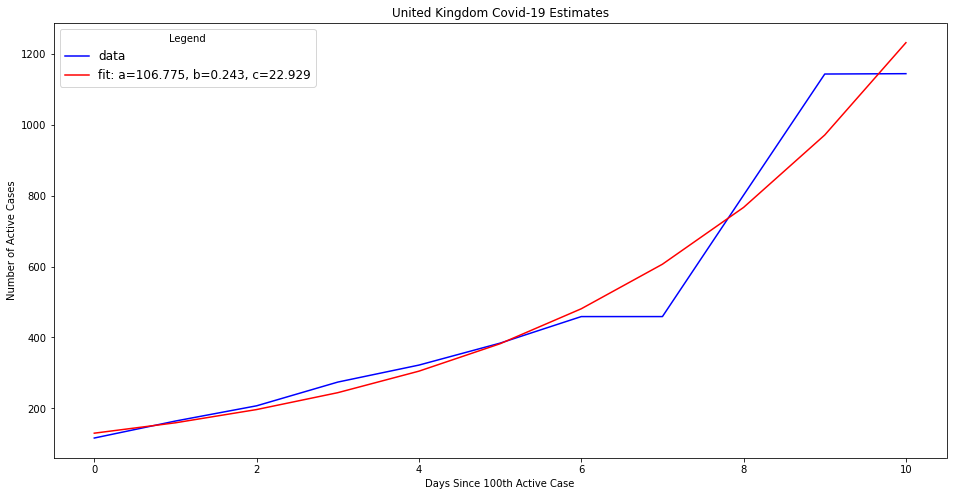

In [27]:


for country in llist:
    
    try:
        plot = dfmelt.loc[(dfmelt['country'] == country) & (dfmelt['cases'].isna() != True)]
        plot = plot.loc[plot.index <=10]
        #plot#['cases'].isna()

        #px.scatter(dfmelt, x=dfmelt.index, y="cases", color='country', trendline="lowess")\
        popt, pcov = curve_fit(func, plot.index, plot.cases)
        #print(popt)

        metadf[country] = popt

        ## Must call fig size before we cann the distplot subplots.

        plt.figure(figsize=(12, 12))

        # Initialize figure and ax
        fig, ax = plt.subplots(figsize=(16, 8))

        # Set the scale of the x-and y-axes
        #ax.set(yscale="log")



        plt.plot(plot.index, plot.cases, 'b-', label='data')
        plt.plot(plot.index, func(plot.index, *popt), 'r-',
                 label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))\
                 #label='fit: a=%5.3f, b=%5.3f' % tuple(popt))\

        # Plot formatting
        plt.legend(prop={'size': 12}, title = 'Legend')
        plt.title(country + ' Covid-19 Estimates')
        plt.xlabel('Days Since 100th Active Case')
        plt.ylabel('Number of Active Cases')
        savepath = country+'.png'
        print(savepath)
        plt.savefig(savepath)
    
    except:
        print('An error occured with exponent analysis for '+country)

In [28]:
metadf

,Australia,Austria,Belgium,Brazil,Canada,China,France,Germany,Iran,Israel,...,Netherlands,Norway,Portugal,Russia,Spain,Sweden,Switzerland,Turkey,US,United Kingdom
0,162.138876,228.559804,72.442000,88.333014,139.593041,9.593060,193.753591,367.595550,906.389220,48.494665,...,197.726065,1142.402551,211.861550,103.859562,265.052627,1003.639734,35.365900,626.213281,129.489022,106.775399
1,0.168594,0.207183,0.265625,0.309643,0.223431,0.624318,0.227585,0.176517,0.201507,0.283877,...,0.200903,0.079193,0.232682,0.226794,0.234055,0.074409,0.401823,0.276226,0.284345,0.242730
2,-70.800205,-156.752055,56.280701,15.291437,-46.906917,497.711218,-132.061724,-280.855438,-909.960805,64.576971,...,-54.487026,-1116.942270,-104.472259,28.808576,-229.695524,-945.072911,175.349969,-443.707301,-23.751721,22.929128


In [29]:
metadfT = metadf.T
metadfT.columns = ['A','B','C']
metadfT.to_csv(r'exponent\analysis.csv')
metadfT.head()

,A,B,C
Australia,162.138876,0.168594,-70.800205
Austria,228.559804,0.207183,-156.752055
Belgium,72.442000,0.265625,56.280701
Brazil,88.333014,0.309643,15.291437
Canada,139.593041,0.223431,-46.906917


No handles with labels found to put in legend.


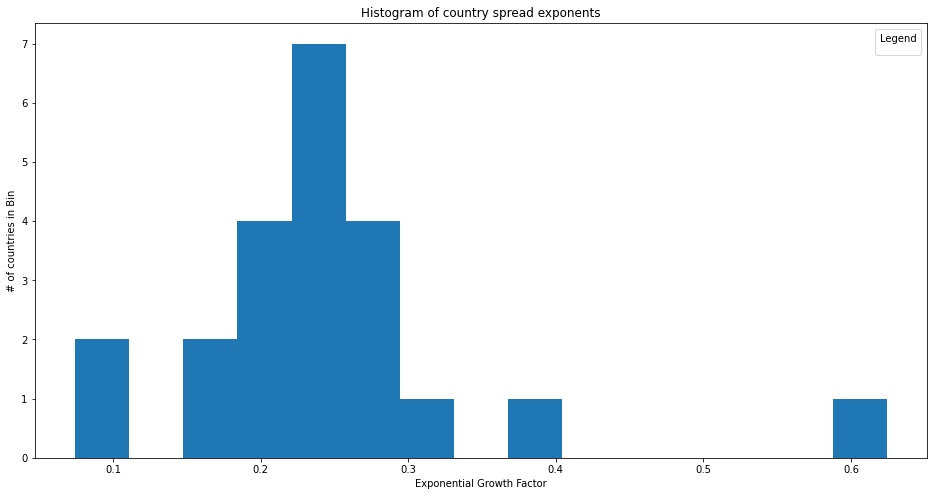

In [30]:
fig, axs = plt.subplots(figsize=(16, 8))

dfmt = metadfT.loc[(metadfT['B'] >= 0.01) & (metadfT['B']< 0.9)]

# We can set the number of bins with the `bins` kwarg
axs.hist(dfmt['B'],bins=15)

# Plot formatting
plt.legend(prop={'size': 12}, title = 'Legend')
plt.title('Histogram of country spread exponents')
plt.xlabel('Exponential Growth Factor')
plt.ylabel('# of countries in Bin')
savepath = 'histogram.png'
plt.savefig(savepath)

# !
